In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
np.random.seed(108)

% matplotlib inline

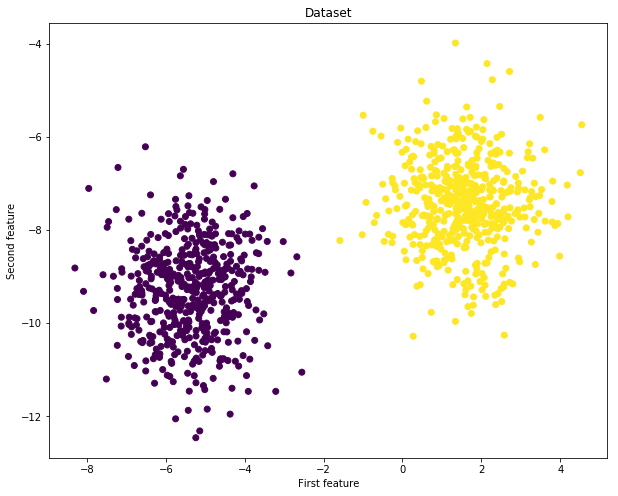

In [2]:
X, y_true = make_blobs(n_samples= 1000, centers=2)

fig = plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=y_true)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [3]:
# Reshape targets to get column vector with shape (n_samples, 1)
y_true = y_true[:, np.newaxis]
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_true)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (750, 2)
Shape y_train: (750, 1)
Shape X_test: (250, 2)
Shape y_test: (250, 1)


## Logistic Regression Class

In [4]:
class LogisticRegression:
    
    def __init__(self):
        pass
    
    def sigmoid(self, a):
        return 1 / (1 + np.exp(-a))
    
    def train(self, X, y_true, n_iters, learning_rate):
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0
        costs = []
        
        for i in range(n_iters):
            y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)
            cost = (-1 / n_samples) * np.sum(y_true * np.log(y_predict)+(1-y_true)*(np.log(1-y_predict)))
            
            dw = (1 / n_samples) * np.dot(X.T, (y_predict - y_true))
            db = (1 / n_samples) * np.sum(y_predict - y_true)

            self.weights = self.weights - learning_rate * dw
            self.bias = self.bias - learning_rate * db
            
            costs.append(cost)
            if i % 100 == 0:
                print(f"Cost after iteration {i}: {cost}")

        return self.weights, self.bias, costs
    
    def predict(self, X):
        y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)
        y_predict_labels = [1 if elem > 0.5 else 0 for elem in y_predict]

        return np.array(y_predict_labels)[:, np.newaxis]

Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.14052347486733338
Cost after iteration 200: 0.08105168143665739
Cost after iteration 300: 0.0585832967046684
Cost after iteration 400: 0.04663546114446753
Cost after iteration 500: 0.03915601998522448
Cost after iteration 600: 0.0340012371571257
Cost after iteration 700: 0.030215649932792663
Cost after iteration 800: 0.027307331989909943
Cost after iteration 900: 0.024996445878665955


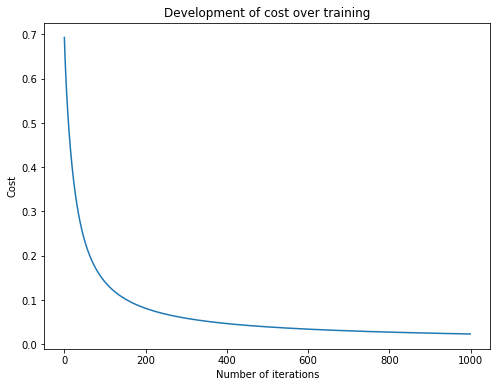

In [5]:
regressor = LogisticRegression()
w_trained, b_trained, costs = regressor.train(X_train, y_train, n_iters=1000, learning_rate=0.009)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(1000), costs)
plt.title("Development of cost over training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [6]:
y_p_train = regressor.predict(X_train)
y_p_test = regressor.predict(X_test)

print(f"train accuracy: {100 - np.mean(np.abs(y_p_train - y_train)) * 100}%")
print(f"test accuracy: {100 - np.mean(np.abs(y_p_test - y_test))}%")

train accuracy: 100.0%
test accuracy: 100.0%
